In [3]:
"""
Created on Tue Feb 12 23:34:44 2019
@author: tobia
"""
import time
import datetime
import urllib.request, json

import numpy as np

import pandas as pd
from datetime import datetime, timedelta
from oceanoobsbrasil.db import GetData

from dotenv import load_dotenv
import os
import requests


In [4]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import pandas as pd
import cloudinary
import cloudinary.uploader
import cloudinary.api

from cloudinary.api import delete_resources_by_tag, resources_by_tag
from cloudinary.uploader import upload
from cloudinary.utils import cloudinary_url

In [5]:
%load_ext autoreload
%autoreload 2
from oceanoobsbrasil.others.synoptic_charts import SynopticChart

In [71]:
response = requests.get(f'https://www.marinha.mil.br/chm/sites/www.marinha.mil.br.chm/files/figuras/ww3/ondas_000_2.gif')
img = Image.open(BytesIO(response.content))
left = 87
top = 56
right = 682
bottom = 745
img = img.crop((left, top, right, bottom))

In [72]:
img = img.convert('RGBA')
img_np = np.array(img)
df = pd.DataFrame(img_np.reshape(689*595, 4), columns=['red', 'green', 'blue', 'opacity'])

In [73]:
df.loc[((df['red']>0)&
      (df['green']>0)&
      (df['blue']>0)&
      (df['opacity']==255)), 'opacity'] = 0

In [74]:
df.loc[((df['red']==255)&(df['green']==255)&(df['blue']==255)&(df['opacity']==255)), 'opacity'] = 0
x = (df['red']==0)&(df['green']==0)&(df['blue']==0)&(df['opacity']==255)
df.loc[x, 'red'] = 255
df.loc[x, 'green'] = 255
df.loc[x, 'blue'] = 255
df.loc[x, 'opacity'] = 255

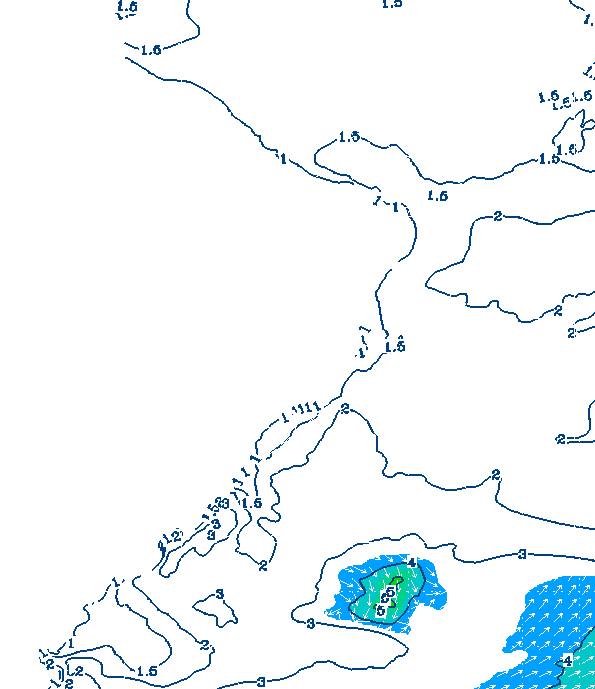

In [75]:
x = pd.DataFrame(np.array(df['opacity']).reshape(689, 595))
x[(x!=0)&(x.diff()!=0)&(x.diff(periods=-1)!=0)&(x.diff(axis=1)!=0)&(x.diff(axis=1,periods=-1)!=0)&(x.notna())] = 0
df['opacity'] = np.array(x).reshape(689*595)
im = Image.fromarray(np.array(df).reshape(689, 595, 4))
im
# im.save(f'{name}.png')

In [176]:
df['opacity'] = np.array(x).reshape(1932*1449)

In [121]:
df3 = df2!=0
df4 = df2.diff()!=0
df5 = df2[df2.diff(periods=-1)!=0]
df6 = df2[df2.diff(axis=1)!=0]
df7 = df2[df2.diff(axis=1, periods=-1)!=0]

In [162]:
x = [[0,0,1,0,0],[0,0,1,0,0],[0,1,0,0,0],[0,1,0,0,0],[1,1,0,1,0],[0,0,0,0,0]] 

In [163]:
x = pd.DataFrame(x)
x

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,1,0,1,0
5,0,0,0,0,0


In [170]:
s = SynopticChart()

In [171]:
s.get()

No images found
22072500
22072512
no image found
22072400
22072412
22072300
22072312
22072200
22072212
22072100
22072112
22072000
22072012
22071900
22071912
